* Download the jester dataset with joke preferences from S3.

In [1]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/main/chapter11/jesterfinal151cols.csv'

* Download them using pandas.

In [2]:
import pandas as pd
jester_data = pd.read_csv(URL, header=None)

* Make some cosmetic adjustments. 
* The rows refer to users, the columns to jokes.

In [3]:
# jester_data.columns = [f"joke_{col}" for col in jester_data.columns]
jester_data.index.name = "users"

In [4]:
jester_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,62,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,99,99,99,-6.78125,99,0.87500,-9.65625,-9.03125,-7.46875,-8.71875,-9.15625,-7.18750,-8.78125,-8.53125,-7.90625,-7.46875,0.03125,8.78125,99.00000,8.78125,99.00000,8.78125,8.78125,99.0000,-0.25000,8.78125,8.78125,99.0000,99.0000,99.0000,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,0.0,8.78125,8.78125,8.78125,99.0,8.78125,99.0,99.0,99.0,8.6875,0.0,99.0,99.0,99.0,99.0,99.0,3.34375,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,34,99,99,99,99,-9.68750,99,9.93750,9.53125,99,99,99,99,9.93750,99,0.40625,3.71875,9.65625,-2.68750,-9.56250,-9.12500,9.84375,99.00000,99.00000,99.00000,99.00000,9.93750,9.78125,9.81250,9.90625,3.12500,5.50000,-4.25000,99.0000,99.00000,5.12500,9.84375,99.0000,99.0000,99.0000,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.00000,99.00000,99.0,99.00000,99.0,99.0,99.0,99.0000,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,18,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,99,99,99,-2.03125,99,-9.93750,-9.96875,-9.87500,-9.81250,-9.78125,-6.84375,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,-9.8125,-9.78125,99.00000,99.00000,-9.8125,0.0625,0.0000,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.00000,99.00000,99.0,99.00000,99.0,99.0,99.0,99.0000,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,82,99,99,99,99,6.90625,99,4.75000,-5.90625,99,99,99,99,-0.40625,99,-4.03125,3.87500,6.21875,5.65625,6.09375,5.40625,6.37500,7.03125,0.09375,99.00000,0.90625,4.18750,0.43750,2.28125,1.18750,0.28125,3.21875,4.90625,99.0000,0.53125,3.81250,4.46875,99.0000,2.8125,4.8125,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.00000,99.00000,99.0,99.00000,99.0,99.0,99.0,99.0000,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,27,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,99,99,99,7.50000,99,-7.21875,-9.43750,0.12500,-9.15625,3.65625,-9.43750,7.90625,99.00000,99.00000,99.00000,99.00000,99.00000,-9.06250,99.00000,6.06250,99.00000,5.96875,99.00000,99.0000,99.00000,8.40625,8.12500,99.0000,99.0000,99.0000,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.00000,99.00000,99.0,99.00000,99.0,99.0,99.0,99.0000,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


* The encoding of choices is a bit weird, so fix this as well.

In [5]:
for col in jester_data.columns:
    jester_data[col] = jester_data[col].apply(lambda x: 0.0 if x>=99 or x<7.0 else 1.0)

In [6]:
jester_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Get rid of people who didn't choose any joke at all.

In [7]:
# keep users with at least one rating for a joke
jester_data = jester_data[jester_data.sum(axis=1) > 0]

In [8]:
jester_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
users,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pip install git+https://github.com/benman1/mab-ranking

  Cloning https://github.com/benman1/mab-ranking to /tmp/pip-req-build-ygvaa_k1
  Running command git clone -q https://github.com/benman1/mab-ranking /tmp/pip-req-build-ygvaa_k1
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 42 kB 994 kB/s 
     |████████████████████████████████| 69 kB 8.7 MB/s 
     |████████████████████████████████| 213 kB 58.1 MB/s 
     |████████████████████████████████| 280 kB 59.0 MB/s 
     |████████████████████████████████| 280 kB 49.3 MB/s 
     |████████████████████████████████| 280 kB 65.7 MB/s 
     |████████████████████████████████| 280 kB 55.1 MB/s 
     |████████████████████████████████| 279 kB 53.3 MB/s 
     |████████████████████████████████| 279 kB 57.3 MB/s 
     |████████████████████████████████| 272 kB 62.6 MB/s 
     |████████████████████████████████| 272 kB 65.4 MB/s 
     |████████████████████████████████| 272 kB 49.8 MB/s 
     |████████████

* Set up bandits as follows.
* Choose independent bandits with Thompson sampling from the Beta
distribution. Recommend the best 10 jokes.

In [10]:
# setting up the bandits:
from mab_ranking.bandits.rank_bandits import IndependentBandits
from mab_ranking.bandits.bandits import BetaThompsonSampling, DirichletThompsonSampling

independent_bandits = IndependentBandits(
    num_arms=jester_data.shape[1],
    num_ranks=10,
    bandit_class=DirichletThompsonSampling
)

* Start the simulation.
* Get feedback on the 10 jokes that display as chosen by our independent
bandits.
* Simulate 7,000 iterations (visits). At each visit, change our choices
according to the updated reward expectations.

In [11]:
from tqdm import trange

num_steps = 7000
hit_rates = []
for _ in trange(1, num_steps + 1):
    selected_items = set(independent_bandits.choose())
    # Pick a users choices at random
    random_user = jester_data.sample().iloc[0, :]
    ground_truth = set(random_user[random_user == 1].index)
    hit_rate = len(ground_truth.intersection(selected_items)) / len(ground_truth)
    feedback_list = [1.0 if item in ground_truth else 0.0 for item in selected_items]
    independent_bandits.update(selected_items, feedback_list)
    hit_rates.append(hit_rate)

100%|██████████| 7000/7000 [01:23<00:00, 83.66it/s]


* Plot the hit rate, the jokes that users are selecting, as follows.
* Introduce a rolling average (over 200 iterations) to get a smoother graph.

Text(0, 0.5, 'Hit rate')

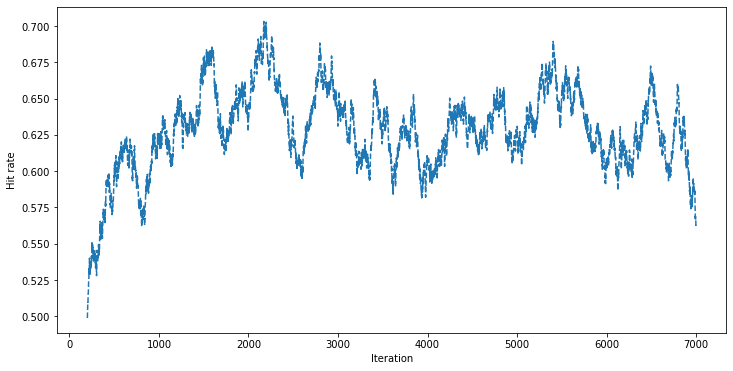

In [12]:
import matplotlib.pyplot as plt

stats = pd.Series(hit_rates)
plt.figure(figsize=(12, 6))
plt.plot(stats.index, stats.rolling(200).mean(), "--")
plt.xlabel('Iteration')
plt.ylabel('Hit rate')

* Supply the categorical user group information, the context.
* Cluster users by their preferences, and use the clusters as context.
* This creates 5 user groups.

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(jester_data)
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaler.transform(jester_data))
contexts = pd.Series(kmeans.labels_, index=jester_data.index)

In [14]:
contexts.value_counts()

0    42292
2     5996
4     1320
3      314
1       39
dtype: int64

* Reset our bandits.
* Then, redo the simulation. Only now, supply the user context.

In [15]:
independent_bandits = IndependentBandits(
    num_arms=jester_data.shape[1],
    num_ranks=10,
    bandit_class=DirichletThompsonSampling
)

num_steps = 7000
hit_rates = []
for _ in trange(1, num_steps + 1):
    # Pick a users choices at random
    random_user = jester_data.sample().iloc[0, :]
    context = {"previous_action": contexts.loc[random_user.name]}
    selected_items = set(independent_bandits.choose(
        context=context
    ))
    ground_truth = set(random_user[random_user == 1].index)
    hit_rate = len(ground_truth.intersection(selected_items)) / len(ground_truth)
    feedback_list = [1.0 if item in ground_truth else 0.0 for item in selected_items]
    independent_bandits.update(selected_items, feedback_list, context=context)
    hit_rates.append(hit_rate)

100%|██████████| 7000/7000 [01:24<00:00, 82.89it/s]


* Visualize the hit rate over time again.

Text(0, 0.5, 'Hit rate')

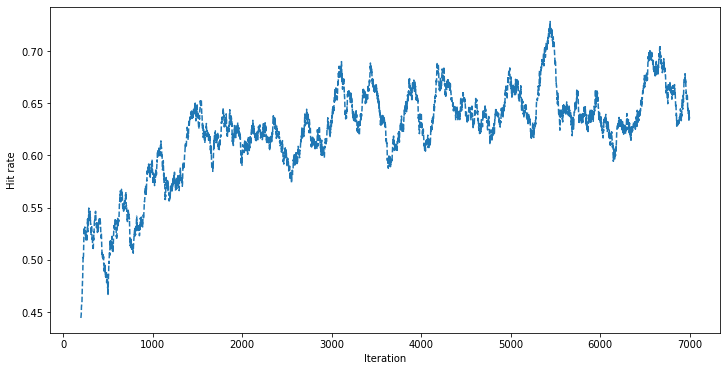

In [16]:
import matplotlib.pyplot as plt

stats = pd.Series(hit_rates)
plt.figure(figsize=(12, 6))
plt.plot(stats.index, stats.rolling(200).mean(), "--")
plt.xlabel('Iteration')
plt.ylabel('Hit rate')

* See that the hit rate is a bit higher than before.
* This model ignores the order of the recommended jokes on hypothetical website.